# F77 - Computer und Datenverarbeitung

## Versuchsteil A

$$\nu_n$$

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
import uncertainties as unc
import uncertainties.unumpy as unp
from helper import *

plt.style.use('dark_background')

%matplotlib inline

str_f = 'f / Hz'
str_A = 'A / V'
str_dA = 'dA / V'


def lorentz(omega, gamma, f_0, omega_0):    
    return f_0 / np.sqrt((omega_0**2-omega**2)**2+gamma**2*omega**2)

In [60]:
df_a = pd.read_csv('data/a.dat', decimal=',', delimiter='\t')

df_a1 = df_a.ix[df_a[str_f] < 400]
df_a2 = df_a.ix[df_a[str_f] > 400]
df_a2 = df_a2.ix[df_a2[str_f] < 3e3]
df_a3 = df_a.ix[df_a[str_f] > 3e3]

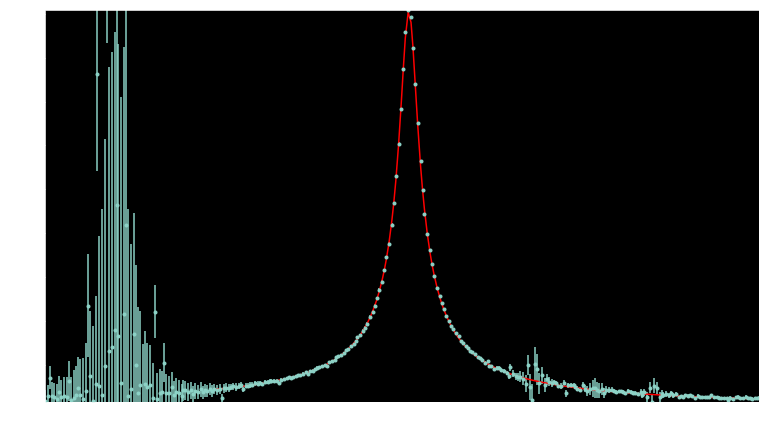

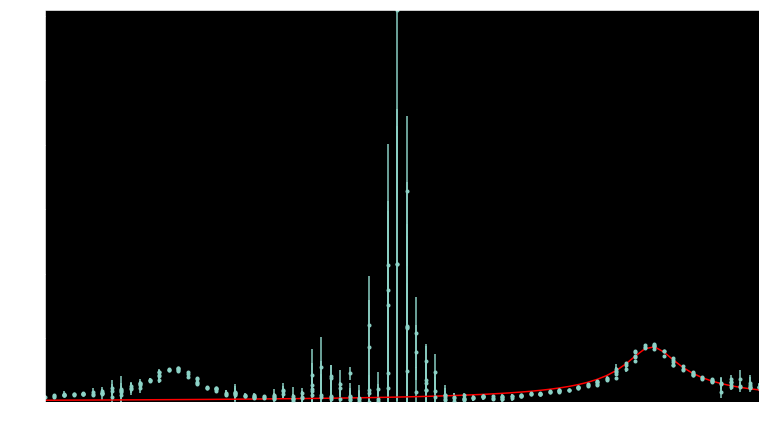

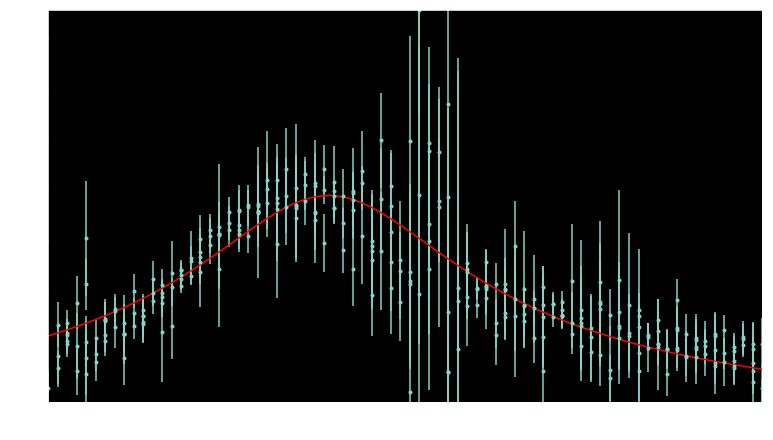

In [78]:
for it, e in enumerate([df_a1, df_a2, df_a3]):
    lmod = Model(lorentz)
    
    if it == 0:
        x = e[str_f][e[str_f] > 260]
        y = e[str_A][e[str_f] > 260]
        dy = e[str_dA][e[str_f] > 260]
    else:
        x = e[str_f]
        y = e[str_A]
        dy = e[str_dA]
    
    fitdata = lmod.fit(
        y, 
        omega=x, 
        gamma=2, 
        f_0=np.max(y), 
        omega_0=(np.max(x)+np.min(x))/2, 
        weights=1/dy
    )
    annotation_text = ''
    annotation_text += prepr(
        "$\omega_0$", fitdata.params['omega_0'].value, fitdata.params['omega_0'].stderr, "Hz", 
        latex=False, aftercomma=3
    ) + '\n'
    
    annotation_text += prepr(
        "$f_0$", fitdata.params['f_0'].value, fitdata.params['f_0'].stderr, "V", 
        latex=False
    ) + '\n'
    
    annotation_text += prepr(
        "$\gamma$", fitdata.params['gamma'].value, fitdata.params['gamma'].stderr, 
        latex=False
    ) + '\n'
    
    annotation_text += prepr(
        "$\chi^2_{red}$", fitdata.redchi, 
        aftercomma=3
    )

    plt.figure(figsize=(12.8,7.2))
    
    plt.errorbar(e[str_f], e[str_A]*1e6, yerr=e[str_dA]*1e6, fmt='.')
    plt.plot(x, fitdata.best_fit*1e6, 'r-')    
    
    plt.xlim((np.min(e[str_f]), np.max(e[str_f])))
    plt.ylim((np.min(y*1e6), np.max(y*1e6)))
    
    plt.xlabel(str_f)
    plt.ylabel('A / $\mu$V')
    
    plt.plot()